In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
pd.set_option('Display.max_columns',None)

In [48]:
df=pd.read_csv('tesla.csv')
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [49]:
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index(df['Date'])
df=df.sort_index()
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2010-06-29,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


# LSTM

In [50]:
input=['Open'	,'High',	'Low',	'Close',	'Volume',	'Adj Close']
output=['Open'	,'High',	'Low',	'Close',	'Volume',	'Adj Close']

In [51]:
n_features=len(input)

In [52]:
X=df[input].values
y=df[output].values

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
y_scaled=scaler.transform(y)

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42,shuffle=False)

In [55]:
def sequences(X,y,ts=1):
  X_seq,y_seq=[],[]

  for i in range(len(X)-ts):
    X_seq.append(X[i:i+ts])
    y_seq.append(y[i+ts])
  return np.array(X_seq),np.array(y_seq)

In [56]:
ts=7
X_train_seq,y_train_seq=sequences(X_train,y_train,ts)
X_test_seq,y_test_seq=sequences(X_test,y_test,ts)

In [57]:
from keras.layers import Dense,LSTM
from keras.models import Sequential

model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(ts,n_features)))
model.add(LSTM(units=30,return_sequences=False))
model.add(Dense(n_features))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [59]:
history=model.fit(X_train_seq,y_train_seq,validation_data=(X_test_seq,y_test_seq),epochs=100)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0794 - mae: 0.1715 - val_loss: 0.0052 - val_mae: 0.0539
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0030 - mae: 0.0343 - val_loss: 0.0023 - val_mae: 0.0365
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0024 - mae: 0.0256 - val_loss: 0.0022 - val_mae: 0.0358
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0021 - mae: 0.0247 - val_loss: 0.0021 - val_mae: 0.0352
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0019 - mae: 0.0226 - val_loss: 0.0031 - val_mae: 0.0419
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019 - mae: 0.0237 - val_loss: 0.0023 - val_mae: 0.0367
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019 - mae: 0.0231 - val_loss: 0.0021 - val_mae: 0.0347
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019 - mae: 0.0228 - val_loss: 0.0021 - val_mae: 0.0337
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss

In [60]:
y_pred=model.predict(X_test_seq)
y_pred_invers=scaler.inverse_transform(y_pred)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [61]:
y_test_invers=scaler.inverse_transform(y_test_seq)

In [62]:
data=pd.DataFrame({
    'Date':df.index[-len(X_test_seq):],
    'Test':y_test_invers[:,5],
    'Predict':y_pred_invers[:,5]
})
data

,Date,Test,Predict
0,2015-11-20,220.009995,224.551071
1,2015-11-23,217.750000,222.721115
2,2015-11-24,218.250000,220.288467
3,2015-11-25,229.639999,220.576050
4,2015-11-27,231.610001,228.293427
...,...,...,...
327,2017-03-13,246.169998,246.696213
328,2017-03-14,258.000000,247.594711
329,2017-03-15,255.729996,254.360443
330,2017-03-16,262.049988,257.918793


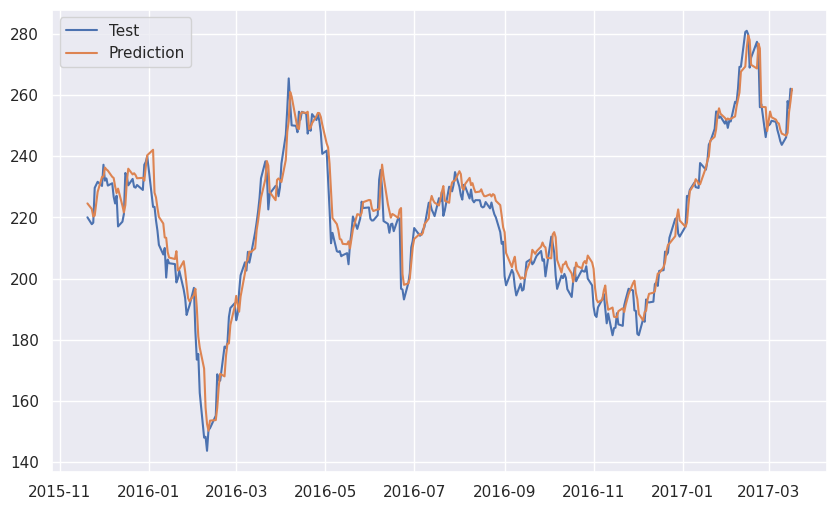

In [63]:
plt.figure(figsize=(10,6))
plt.plot(df.index[-len(y_test_invers):],y_test_invers[:,5],label='Test')
plt.plot(df.index[-len(y_pred_invers):],y_pred_invers[:,5],label='Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
def predict_future(model,last_sequences,n_days=30,scaler=None):
  future_prediction=[]
  current_sequences=last_sequences[-7:]

  for _ in range(n_days):
    current_sequences_reshaped=current_sequences.reshape((1,7,current_sequences.shape[1]))
    next_pred=model.predict(current_sequences_reshaped)
    future_prediction.append(next_pred[0])
    current_sequences=np.roll(current_sequences,shift=-1,axis=0)
    current_sequences[-1]=next_pred

  future_prediction=np.array(future_prediction)
  if scaler is not None:
    future_prediction=scaler.inverse_transform(future_prediction)

  start_date='2017-03-17'
  future_dates=pd.date_range(start=start_date,periods=len(future_prediction),freq='B')

  data=pd.DataFrame({
      'Date':future_dates,
      'Prediction':future_prediction[:,5]
  })
  return data

last_sequences=X_test_seq[-7]
future_preds=predict_future(model,last_sequences,n_days=30,scaler=scaler)
print('Prediksi 30 hari ke depan:\n')
for i,rows in future_preds.iterrows():
  print(f"Date:{rows['Date'].strftime('%Y-%m-%d'):}, 'Prediction:{rows['Prediction']:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

# ARIMA

In [65]:
!pip install pmdarima

In [66]:
from pmdarima import auto_arima

arima=auto_arima(df['Adj Close'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9808.160, Time=4.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9805.682, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9806.104, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9806.102, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9805.414, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9808.103, Time=1.61 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 6.572 seconds


In [67]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(df['Adj Close'],order=(1,2,2))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [68]:
train=df['Adj Close'].iloc[:-30]
test=df['Adj Close'].iloc[-30:]

In [69]:
start=len(train)
end=start+ len(test)-1
pred=model.predict(start=start,end=end,typ='levels')

<Axes: xlabel='Date'>

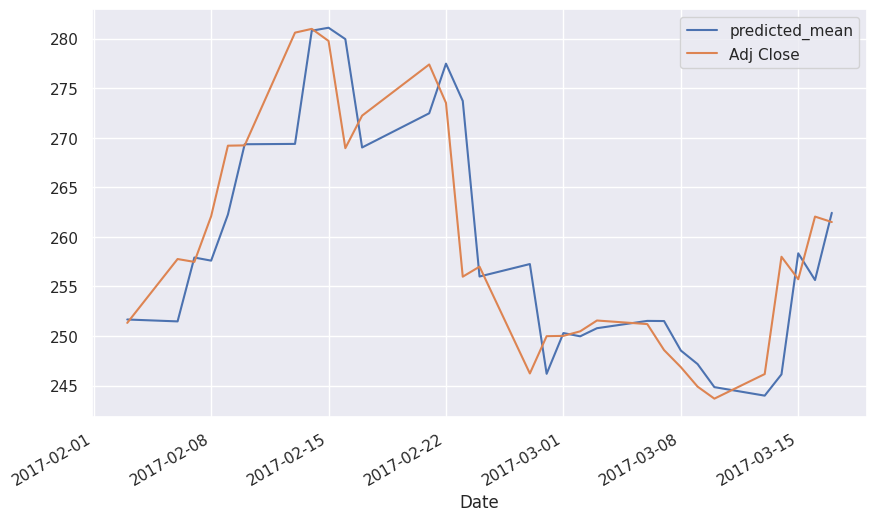

In [70]:
plt.figure(figsize=(10,6))
pred.plot(legend=True)
test.plot(legend=True)

In [71]:
index_future_dataset=pd.date_range(start='2017-03-17',periods=30,freq='B')
pred2=model.predict(start=len(df),end=len(df)+30-1,typ='levels')
pred2.index=index_future_dataset
print(pred2)

2017-03-17    261.400961
2017-03-20    261.778402
2017-03-21    261.684300
2017-03-22    262.056855
2017-03-23    261.967588
2017-03-24    262.335358
2017-03-27    262.250826
2017-03-28    262.613911
2017-03-29    262.534016
2017-03-30    262.892511
2017-03-31    262.817159
2017-04-03    263.171158
2017-04-04    263.100254
2017-04-05    263.449852
2017-04-06    263.383305
2017-04-07    263.728591
2017-04-10    263.666310
2017-04-11    264.007373
2017-04-12    263.949272
2017-04-13    264.286200
2017-04-14    264.232191
2017-04-17    264.565068
2017-04-18    264.515068
2017-04-19    264.843978
2017-04-20    264.797904
2017-04-21    265.122929
2017-04-24    265.080699
2017-04-25    265.401919
2017-04-26    265.363455
2017-04-27    265.680949
Freq: B, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


# Random Forest

In [72]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2010-06-29,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [74]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['Adj Close','Date'],axis=1)
y=df['Adj Close']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=False)

In [75]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [77]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [78]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

y_pred=rf.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE:',mae)
print('R2:',r2)

MSE: 0.1973741274048339
MAE: 0.19160818648967878
R2: 0.9996740435056737


In [82]:
# input_user=[[17.000000	,22.00	,19.540001	,24.699999	,17676300]]
input_user=[[25.000000	,25.92	,20.270000	,21.959999	,8218800]]
input_scaled=scaler.transform(input_user)
predict=rf.predict(input_scaled)
print('Adj Close Predicted:',predict[0])

Adj Close Predicted: 21.95229958999999


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
